Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

In [1]:
#import the necessary library
import pandas as pd
import numpy as np


In [2]:
#read the data

data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',low_memory=0)
data.head(3)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(18175, 136)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


## Check For Sample Representativity
Most of the courses  offered are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

Where are these new coders located.
What are the locations with the greatest number of new coders.
How much money new coders are willing to spend on learning.
Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.
So we first need to clarify whether the data set has the right categories of people for our purpose. The JobRoleInterest column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So let's take a look at the frequency distribution table of this column and determine whether the data we have is relevant.

In [5]:
#frequency of the jobs
Jobs = data['JobRoleInterest'].value_counts(normalize=True)*100
Jobs.head(15)

Full-Stack Web Developer                                                       11.770595
  Front-End Web Developer                                                       6.435927
  Data Scientist                                                                2.173913
Back-End Web Developer                                                          2.030892
  Mobile Developer                                                              1.673341
Game Developer                                                                  1.630435
Information Security                                                            1.315789
Full-Stack Web Developer,   Front-End Web Developer                             0.915332
  Front-End Web Developer, Full-Stack Web Developer                             0.800915
  Product Manager                                                               0.786613
Data Engineer                                                                   0.758009
  User Experience Des

The information in the table above is quite granular, but from a quick scan it looks like:

A lot of people are interested in web development (full-stack web development, front-end web development and back-end web development).
A few people are interested in mobile development.
A few people are interested in domains other than web and mobile development.

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

In [6]:
# Removing null values and selecting only web and mobile development courses
jobs_clean = data['JobRoleInterest'].dropna()
web_or_mobile = jobs_clean.str.contains('Web Developer|Mobile Developer')
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


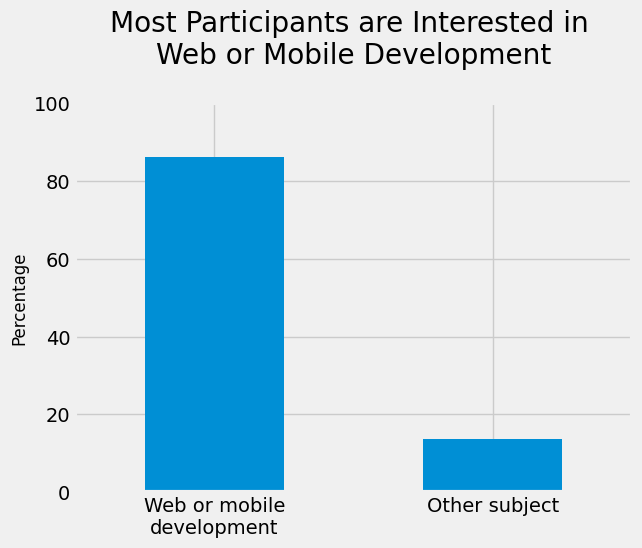

In [7]:
# Graph for the frequency table above
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

## New Coders - Locations and Densities
Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coders there are) for each location.

To make sure you're working with a representative sample, drop all the rows where participants didn't answer what role they are interested in. Where a participant didn't respond, we can't know for sure what their interests are, so it's better if we leave out this category of participants.

In [8]:
# Isolate the participants that answered what role they'd be interested in
df = data[data['JobRoleInterest'].notnull()].copy()

# Frequency tables with absolute and relative frequencies
absolute_frequencies = df['CountryLive'].value_counts()
relative_frequencies = df['CountryLive'].value_counts(normalize = True) * 100

# Display the frequency tables in a more readable format
pd.DataFrame(data = {'Absolute frequency': absolute_frequencies, 
                     'Percentage': relative_frequencies})

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Liberia,1,0.014624
Papua New Guinea,1,0.014624
Guadeloupe,1,0.014624
Gibraltar,1,0.014624


## Spending Money For Learning
we found useful information about the location of new coders, and what are the countries where new coders live, but we need to go more in depth with our analysis before taking a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.
It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [9]:
# Replace 0s with 1s to avoid division by 0
df['MonthsProgramming'].replace(0,1, inplace = True)

# New column for the amount of money each student spends each month
df['money_per_month'] = df['MoneyForLearning'] / df['MonthsProgramming']
df['money_per_month'].isnull().sum()

675

In [10]:
# Keep only the rows with non-nulls in the `money_per_month` column 
df = df[df['money_per_month'].notnull()]

In [11]:
# Remove the rows with null values in 'CountryLive'
df = df[df['CountryLive'].notnull()]
df['CountryLive'].value_counts()


United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
                            ... 
Gibraltar                      1
Lebanon                        1
Papua New Guinea               1
Somalia                        1
Gambia                         1
Name: CountryLive, Length: 131, dtype: int64

In [12]:
#select data in top four english sparaking country
df1=df[df['CountryLive'].isin(['United States of America','India','United Kingdom','Canada'])].copy()
df1.head(3)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.000000
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [13]:
# Mean sum of money spent by students each month
countries_mean = df1.groupby('CountryLive').mean()
countries_mean['money_per_month']

C:\Users\Admin\AppData\Local\Temp\ipykernel_20552\2458558239.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  countries_mean = df1.groupby('CountryLive').mean()


CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: money_per_month, dtype: float64

The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct.

## Dealing with Outliers


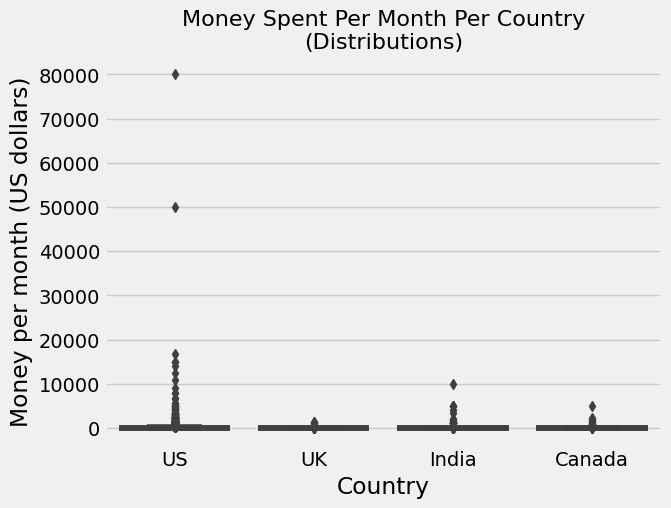

In [14]:
# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = df1)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two persons spend each month 50,000 and 20,000 per month, which is impossible.


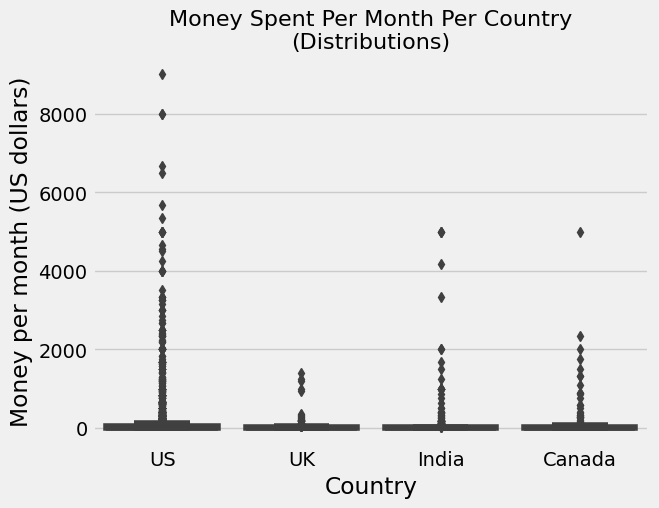

In [15]:
#isolate the participate who spent 10,000 or less and redraw the boxplot
df1 = df1[df1['money_per_month'] < 10000]
import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = df1)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()


We can see a few extreme outliers for India (values over $2500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.

In [16]:
# Inspect the extreme outliers for India
india_outliers = df1[
    (df1['CountryLive'] == 'India') & 
    (df1['money_per_month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


It seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. The actual question of the survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", so they might have misunderstood and thought university tuition is included. It seems safer to remove these two rows.

In [17]:
# Remove the outliers for India
df1 = df1.drop(india_outliers.index) 

In [18]:
# Examine the extreme outliers for the US
us_outliers = df1[
    (df1['CountryLive'] == 'United States of America') & 
    (df1['money_per_month'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000


In [19]:
# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = df1[
    (df1['CountryLive'] == 'United States of America') & 
    (df1['money_per_month'] >= 6000) &
    (df1['AttendedBootcamp'] == 0)
]

df1 = df1.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = df1[
    (df1['CountryLive'] == 'United States of America') & 
    (df1['money_per_month'] >= 6000) &
    (df1['MonthsProgramming'] <= 3)
]

df1 = df1.drop(less_than_3_months.index)

In [20]:
# Examine the extreme outliers for Canada
canada_outliers = df1[
    (df1['CountryLive'] == 'Canada') & 
    (df1['money_per_month'] > 4500)]

canada_outliers


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

In [21]:
df1 = df1.drop(canada_outliers.index)
# Recompute mean sum of money spent by students each month
df1.groupby('CountryLive').mean()['money_per_month']

C:\Users\Admin\AppData\Local\Temp\ipykernel_20552\1757009118.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby('CountryLive').mean()['money_per_month']


CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64

## Choosing The best Markets


At this point, it seems that we have several options:

Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:

60% for the US, 25% for India, 15% for Canada.
50% for the US, 30% for India, 20% for Canada; etc.
Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:

70% for the US, and 30% for India.
65% for the US, and 35% for Canada; etc.
Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

## Conclusion
In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.